# overview
-   A python 2D/3D plotting library which produces publication quality figures.
    Can be used in python scripts, python and ipython shells and jupyter
    notebooks.

-   The purpose of a plotting package is to assist you in visualizing your data
    as easily as possible, with all the necessary control -- that is, by using
    relatively high-level commands most of the time, and still have the ability
    to use the low-level commands when needed.

# installation
-   matplotlib package.

-   dependencies for additional backends.
    *   tk: tk-based backends
    *   PyQt4: Qt4-based backends
    *   PyQt5: Qt5-based backends
    *   PyGObject: GTK3-based backends
    *   wxpython: wx-based backends
    *   cairocffi or pycairo: cairo-based backends
    *   tornado: WebAgg backends

-   better support of animation output format and image file formats.
    *   ffmpeg: saving movies.
    *   imagemagick: saving animated gifs
    *   pillow: more image formats
    *   latex and ghostscript: rendering text with latex

# Concepts
## figure terminology
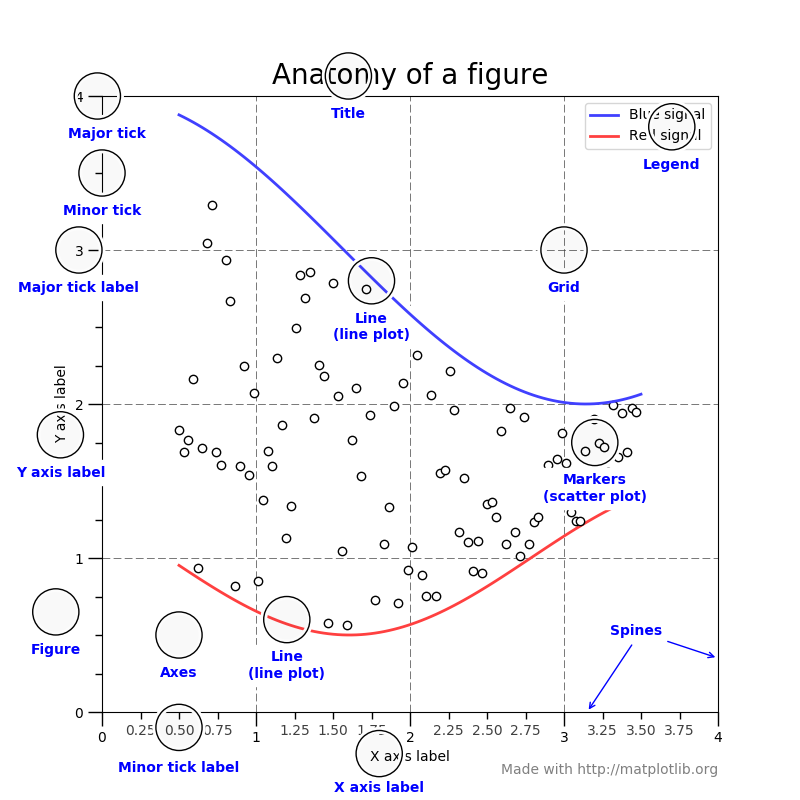

## hierarchy
-   Everything in matplotlib is organized in a hierarchy.

    *   At the top of the hierarchy is the state-machine environment, provided
        by the matplotlib.pyplot module. (similar to MATLAB).
    *   next level is the firt level of the object-oriented interface, in which
        pyplot is used only for a few functions such as figure creation, and
        the user explicitly creates and keeps track of the figure and axes
        objects.
    *   For even more control, the pyplot level may be dropped completely,
        leaving a purely object-oriented approach.

# Coding style
```python
import matplotlib.pyplot as plt
import numpy as np
```
Use pyplot for creating figures, and then use object methods for the rest.

Signature of helper function for plotting a specific function with different
data:

```python
def plot_somefun(ax, data1, data2, param_dict):
    """
    A helper function to plot somefun.

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out
```

# APIs

## matplotlib module
-   `use()`. must be called before importing `matplotlib.pyplot`. Otherwise has
    no effect. It's use should be avoided unless absolutely necessary.

-   `interactive()`

-   `is_interactive()`

## pyplot
-   `figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=matplotlib.figure.Figure, clear=False, **kwargs)`
    create a new figure.
    *   `num`. int or str. If not provided, a new figure will be created, and
        the figure number will be incremented. The figure objects holds this
        number in a `number` attribute. If num is provided, and a figure with
        this id already exists, make it active, and returns a reference to it.
        If this figure does not exists, create it and returns it. If num is a
        string, the window title will be set to this figure's num (but
        `number` is still an integer, auto-incremented).
    *   `figsize`. a 2-tuple `(width, height)`. figure's width and height in
        inches. default to `figure.figsize` rcParam.
    *   `dpi`. integer. resolution. default `figure.dpi` rcParam.
    *   `facecolor`. background color. default `figure.facecolor` rcParam.
    *   `edgecolor`. border color. default `figure.edgecolor` rcParam.
    *   `frameon`. bool. default True. whether to draw figure frame.
    *   `FigureClass`. use custom Figure subclass.
    *   `clear`. bool. default False. whether to clear figure if it already
        exists.

    returns the Figure instance.
-   `show(*args, **kwargs)`. In non-interactive mode, display all figures and
    block until the figures have been closed; in interactive mode it has no
    effect and do not block.
-   `close(fig=None)`. close the figure, 对于 GUI backends, 就是关闭 figure 对
    应的 window. close a figure 之后, pyplot 会释放显示 figure 所占用的内存.
-   `subplot(*args, **kwargs)`. add a subplot to the current figure.
    *   `*args`. Three formats:
        -   a 3-digit integer `NNN`. the first digit is the number of rows, the
            second digit is the number of columns, the third digit is the index
            position of the subplot. Clearly each digit must be less than 10.
        -   a sequence of 3 integers `nrows, ncols, index`. the subplot will
            take the index position on a grid with nrows rows and ncols
            columns. index starts at 1 in the upper left corner and increases
            to the right.
        -   a subplot axes instance that is already created in the present
            figure, but not in the figure's list of axes (e.g., removed from
            the figure). 此时作用是将这个 subplot 重新加入 figure 中.

    following kwargs are recognized:
    *   `projection`.
    *   `polar`.
    *   `sharex`. Axes. Share the x axis. The axis will have the same limits,
        ticks, and scale as the axis of the shared axes. The changes to shared
        axes are synced.
    *   `sharey`. Axes. ditto for y.
    *   `label`. A label for the returned axes. if you want two subplots that
        are otherwise identical to be added to the figure, make sure you give
        them unique labels. (因为如果一个新的 subplot call 使用的参数与现存的
        subplot 创建时传入的参数相同, 会直接返回原有的 subplot, 不会创建新的.)
    *   `**kwargs`. All other keyword arguments are passed to the returned axes
        base class.

    returns the axes of the subplot. The returned axes base class depends on
    the projection used. The returned axes is a subplot subclass of the base
    class.

    Creating a subplot will delete any pre-existing subplot that overlaps with
    it beyond sharing a boundary.
-   `subplots(*args, **kwargs)`.
-   `plot()`
    *   default format string is `b-`.
    *   all sequences are converted to numpy arrarys internally.
-   `axis(*v, **kwargs)`. get or set axis properties.
    call signatures:
    *   `axis()`. do nothing, simply return axis limits.
    *   `axis(xmin, xmax, ymin, ymax)`. set axis limits. all limits must be
        given.
    *   `axis("<option>")`. See doc for available options.
    *   `axis(**kwargs)`. specify kwargs. available kwargs: ``emit=True``.

    returns current axis limits as a 4-tuple ``(xmin, xmax, ymin, ymax)``.
-   `xlabel()`
-   `ylabel()`
-   `title()`
-   `legend()`
-   `draw()`
-   `ion()`
-   `ioff()`

## Figure
-   Represent the whole figure.
-   The figure keeps track of all the child Axes, a smattering of 'special'
    artists (titles, figure legends, etc), and the canvas.

## Axes
-   A plot, or the region of the image with the data space.
-   A given figure can contain many Axes, but a given Axes object can only be
    in one Figure.
-   An Axes contains two (or three in the case of 3D) Axis objects.

### instance methods
-   `set_xlim()`
-   `set_ylim()`
-   `set_xlabel()`
-   `set_ylabel()`
-   `set_title()`

## Axis
-   the number-line-like objects. They take care of setting the graph limits
    and generating the ticks (the marks on the axis) and ticklabels (strings
    labeling the ticks).
-   The location of the ticks is determined by a Locator object and the
    ticklabel strings are formatted by a Formatter.

## Artist
-   Basically everything you can see on the figure is an artist (even the
    Figure, Axes, and Axis objects).
-   When the figure is rendered, all of the artists are drawn to the canvas.
-   Most Artists are tied to an Axes; such an Artist cannot be shared by
    multiple Axes, or moved from one to another.

# backends

## overview
-   frontend and backend. the "frontend" is the user facing code, i.e., the
    plotting code, whereas the "backend" does all the hard work
    behind-the-scenes to make the figure.

-   To support different use cases, matplotlib can target different outputs,
    and each of these capabilities is called a backend.

-   There are two kinds of backends: user interface backends (interactive),
    hardcopy backends (non-interactive).

## renderer
Renderer is the thing that actually does the drawing. There are vector and
raster renderers.

table of renderers:

| Renderer | Filetypes | description |
| :------- | :-------- | :---------- |
| AGG      | png       | raster graphics -- Anti-Grain Geometry engine |
| PS       | ps, eps   | vector graphics |
| PDF      | pdf       | vector graphics |
| SVG      | svg       | vector graphics |
| Cairo    | png, ps, pdf, svg | raster and vector graphics, with Cairo graphics library |

## canvas
Canvas is the place where the drawing goes.

List of canvases: Qt4, Qt5, Jupter notebook, GTK3, Cocoa, Tk, Web, wxWidgets.

## configuration
-   backend configuration precedence (lowest to highest):

    *   the `backend` key in `matplotlibrc` file.
    *   `MPLBACKEND` environ: `module://backend.module`
    *   programmatically with `matplotlib.use()` function.

-   A list of backends, combining user interfaces and renderers:
    Qt5Agg, ipympl, GTK3Agg, macosx, TkAgg, nbAgg, WebAgg, GTK3Cairo, Qt4Agg,
    WXAgg.

# Interactive and non-interactive modes
-   In interactive mode, pyplot functions automatically draw to the screen, 输
    出效果是随着各种 pyplot functions 的执行自动更新的.

    *   pyplot functions do not block the thread.
    *   When plotting interactively, if using object method calls in addition
        to pyplot functions, then call `draw()` whenever you want to refresh
        the plot.

-   In non-interactive mode, pyplot functions does not draw to the screen
    automatically, `pyplot.show()` must be called explicitly to show the
    figure.

    *   `pyplot.show()` blocks the thread until the window of displayed figures
        are destroyed manually.


